In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [3]:
clean_df = df[(df['value'] < (df['value']).quantile(0.975)) & (df['value'] > (df['value']).quantile(0.025))]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


C:\Users\muham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='value'>

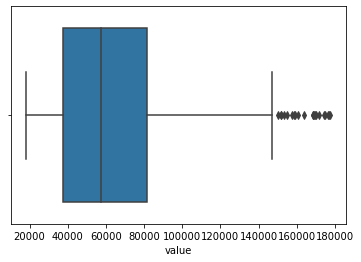

In [4]:
sns.boxplot(clean_df['value'])

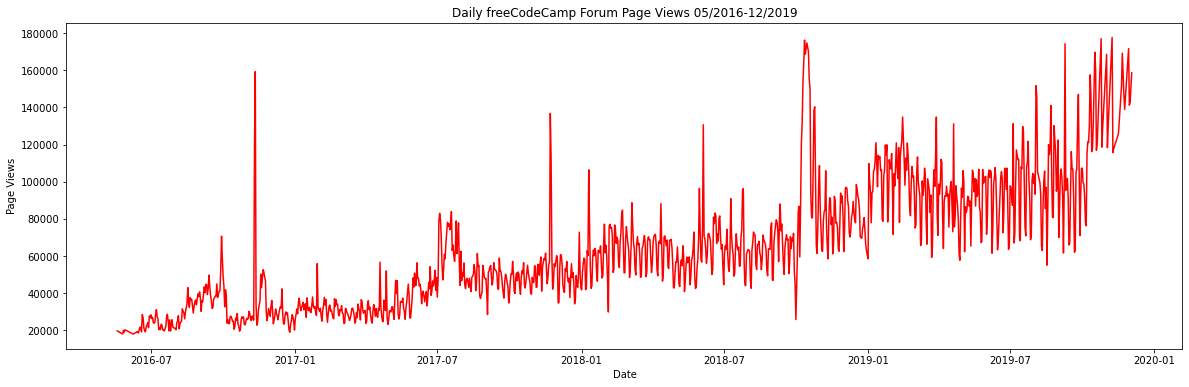

In [7]:
plt.figure(figsize=(20,6))
plt.title("Daily freeCodeCamp Forum Page Views " + datemin + "-" + datemax)
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.plot(clean_df, 'r')

In [6]:
datemin = clean_df.index[0].strftime("%m/%Y")
datemax = clean_df.index[-1].strftime("%m/%Y")

In [9]:
df = clean_df

In [10]:
df['month'] = df.index.month
df['year'] = df.index.year


In [12]:
df

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [13]:
df_bar = df.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

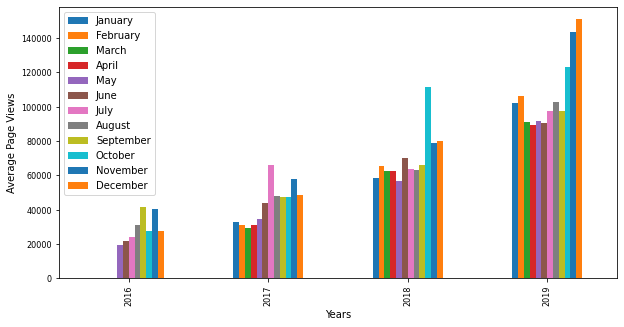

In [21]:
fig = df_bar.plot.bar(legend=True, figsize=(10, 5), ylabel="Average Page Views", xlabel="Years").figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

In [22]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [23]:
df_box

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016
...,...,...,...,...
1233,2019-11-24,138875,Nov,2019
1234,2019-11-29,171584,Nov,2019
1235,2019-11-30,141161,Nov,2019
1236,2019-12-01,142918,Dec,2019


Text(0, 0.5, 'Page Views')

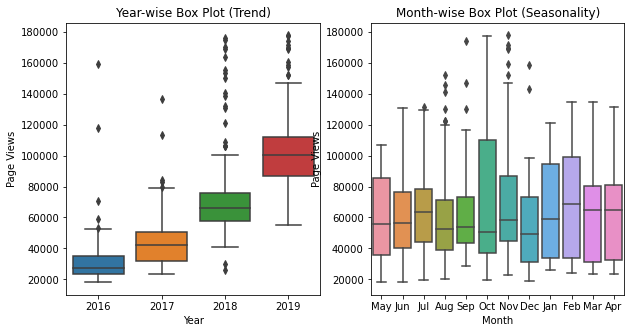

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax = axes[0])
axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax = axes[1])

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

In [41]:
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')
df_box

,date,value,month,year,month_num
210,2017-01-06,37353,Jan,2017,1
937,2019-01-06,94108,Jan,2019,1
936,2019-01-05,77897,Jan,2019,1
935,2019-01-04,94514,Jan,2019,1
934,2019-01-03,100710,Jan,2019,1
...,...,...,...,...,...
567,2017-12-29,72819,Dec,2017,12
566,2017-12-28,51018,Dec,2017,12
565,2017-12-27,43075,Dec,2017,12
201,2016-12-28,28424,Dec,2016,12
